In [151]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense , Input,Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import GRU, Dense

In [152]:
df4=pd.read_csv(r"C:\Users\Jaya Teja\Stock_Sentiment_Analysis_Using_Machine_Learning_Open_Project\Finance_Project\df4.csv")

In [153]:
df4=df4.drop("Unnamed: 0",axis=1)

In [154]:
df4.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Company,clean_title
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481140,104487900.0,1,1.0,strong apple 2022 product line could look like...
1,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400.0,1,3.0,lg energy solution start taking order could so...
2,2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000.0,1,2.0,updating 2021 call suggesting strategic positi...
3,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203217,99310400.0,0,1.0,3 trillion beginning apple apple car come prep...
4,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300.0,0,3.0,tesla open showroom xinjiang chinese region as...


In [155]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1746 non-null   object 
 1   Open         1746 non-null   float64
 2   High         1746 non-null   float64
 3   Low          1746 non-null   float64
 4   Close        1746 non-null   float64
 5   Adj Close    1746 non-null   float64
 6   Volume       1746 non-null   float64
 7   Label        1746 non-null   int64  
 8   Company      1746 non-null   float64
 9   clean_title  1746 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 136.5+ KB


In [156]:
df4['Date'] = pd.to_datetime(df4['Date'])

In [157]:
df4['year'] = df4['Date'].dt.year
df4['month'] = df4['Date'].dt.month
df4['day'] = df4['Date'].dt.day
df4['dayofweek'] = df4['Date'].dt.dayofweek  # Monday=0, Sunday=6
df4['dayofyear'] = df4['Date'].dt.dayofyear
df4['is_month_start'] = df4['Date'].dt.is_month_start.astype(int)
df4['is_month_end'] = df4['Date'].dt.is_month_end.astype(int)

In [158]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1746 non-null   datetime64[ns]
 1   Open            1746 non-null   float64       
 2   High            1746 non-null   float64       
 3   Low             1746 non-null   float64       
 4   Close           1746 non-null   float64       
 5   Adj Close       1746 non-null   float64       
 6   Volume          1746 non-null   float64       
 7   Label           1746 non-null   int64         
 8   Company         1746 non-null   float64       
 9   clean_title     1746 non-null   object        
 10  year            1746 non-null   int64         
 11  month           1746 non-null   int64         
 12  day             1746 non-null   int64         
 13  dayofweek       1746 non-null   int64         
 14  dayofyear       1746 non-null   int64         
 15  is_m

## Modle on Sentimen Intensity Analyser

In [159]:
sentiment_scores=pd.read_pickle("sentiment_scores.pkl")

In [160]:
neg_sentiment=sentiment_scores.apply(lambda x: x['neg'])
neg_sentiment.name='neg'
neu_sentiment=sentiment_scores.apply(lambda x: x['neu'])
neu_sentiment.name='neu'
pos_sentiment=sentiment_scores.apply(lambda x:x['pos'])
pos_sentiment.name='pos'
comp_sentiment=sentiment_scores.apply(lambda x: x['compound'])
comp_sentiment.name='comp'

In [161]:
neg_sentiment

0       0.022
1       0.055
2       0.048
3       0.018
4       0.056
        ...  
1741    0.050
1742    0.034
1743    0.063
1744    0.077
1745    0.097
Name: neg, Length: 1746, dtype: float64

In [162]:
req_col=["Open","High","Low","Close","Volume","year","month","day","dayofweek","dayofyear","is_month_start","is_month_end"]
final_df=pd.concat([df4[req_col],neg_sentiment,neu_sentiment,pos_sentiment,comp_sentiment],axis=1)


In [163]:
final_df

,Open,High,Low,Close,Volume,year,month,day,dayofweek,dayofyear,is_month_start,is_month_end,neg,neu,pos,comp
0,177.830002,182.880005,177.710007,182.009995,104487900.0,2022,1,3,0,3,0,0,0.022,0.781,0.197,0.9941
1,382.583344,400.356659,378.679993,399.926666,103931400.0,2022,1,3,0,3,0,0,0.055,0.813,0.132,0.9900
2,167.550003,170.703506,166.160507,170.404495,63520000.0,2022,1,3,0,3,0,0,0.048,0.698,0.254,0.9904
3,182.630005,182.940002,179.119995,179.699997,99310400.0,2022,1,4,1,4,0,0,0.018,0.818,0.165,0.9849
4,396.516663,402.666656,374.350006,383.196655,100248300.0,2022,1,4,1,4,0,0,0.056,0.784,0.160,0.9821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,169.529999,170.610001,168.149994,169.889999,50558300.0,2024,4,25,3,116,0,0,0.050,0.747,0.203,0.9468
1742,169.679993,173.919998,166.320007,173.669998,49249400.0,2024,4,25,3,116,0,0,0.034,0.684,0.282,0.9897
1743,177.800003,180.820007,176.130005,179.619995,43919800.0,2024,4,26,4,117,0,0,0.063,0.720,0.217,0.9762
1744,169.880005,171.339996,169.179993,169.300003,44838400.0,2024,4,26,4,117,0,0,0.077,0.793,0.130,0.5733


In [164]:
test_size=51

In [165]:
final_y=final_df["Close"]

In [166]:
final_y

0       182.009995
1       399.926666
2       170.404495
3       179.699997
4       383.196655
           ...    
1741    169.889999
1742    173.669998
1743    179.619995
1744    169.300003
1745    168.289993
Name: Close, Length: 1746, dtype: float64

In [167]:
final_df=final_df.drop("Close",axis=1)

In [168]:
X_test=final_df[-test_size:]
y_test=final_y[-test_size:]

In [169]:
comb_train=pd.concat([final_df.iloc[:-test_size,:],final_y[:-test_size]],axis=1)
comb_train

,Open,High,Low,Volume,year,month,day,dayofweek,dayofyear,is_month_start,is_month_end,neg,neu,pos,comp,Close
0,177.830002,182.880005,177.710007,104487900.0,2022,1,3,0,3,0,0,0.022,0.781,0.197,0.9941,182.009995
1,382.583344,400.356659,378.679993,103931400.0,2022,1,3,0,3,0,0,0.055,0.813,0.132,0.9900,399.926666
2,167.550003,170.703506,166.160507,63520000.0,2022,1,3,0,3,0,0,0.048,0.698,0.254,0.9904,170.404495
3,182.630005,182.940002,179.119995,99310400.0,2022,1,4,1,4,0,0,0.018,0.818,0.165,0.9849,179.699997
4,396.516663,402.666656,374.350006,100248300.0,2022,1,4,1,4,0,0,0.056,0.784,0.160,0.9821,383.196655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,169.080002,169.339996,168.229996,49329500.0,2024,4,2,1,93,0,0,0.094,0.765,0.142,0.6908,168.839996
1691,179.070007,180.789993,178.380005,32611500.0,2024,4,2,1,93,0,0,0.053,0.719,0.228,0.9819,180.690002
1692,164.020004,168.820007,163.279999,82950100.0,2024,4,3,2,94,0,0,0.197,0.717,0.086,-0.9538,168.380005
1693,179.899994,182.869995,179.800003,31046600.0,2024,4,3,2,94,0,0,0.050,0.556,0.394,0.9974,182.410004


In [170]:
shuffled_df = comb_train.sample(frac=1, random_state=42)
shuffled_df

,Open,High,Low,Volume,year,month,day,dayofweek,dayofyear,is_month_start,is_month_end,neg,neu,pos,comp,Close
931,193.130005,195.289993,189.440002,123660000.0,2023,3,29,2,88,0,0,0.133,0.682,0.185,0.8020,193.880005
1398,142.020004,142.649994,139.839996,36235400.0,2023,11,9,3,313,0,0,0.075,0.680,0.244,0.9488,140.600006
1561,160.699997,161.729996,158.490005,45207400.0,2024,1,30,1,30,0,0,0.126,0.648,0.226,0.9827,159.000000
1006,104.040001,105.389999,103.309998,45345500.0,2023,5,4,3,124,0,0,0.055,0.661,0.285,0.9910,104.000000
506,129.500000,131.380005,126.389999,57429800.0,2022,9,2,4,245,0,0,0.097,0.694,0.209,0.8360,127.510002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,130.240005,131.399994,129.639999,35895400.0,2023,7,5,2,186,0,0,0.073,0.729,0.198,0.9698,130.380005
1294,174.550003,176.300003,173.860001,63047900.0,2023,9,21,3,264,0,0,0.032,0.941,0.027,-0.1280,173.929993
860,150.089996,150.339996,147.240005,48394200.0,2023,2,23,3,54,0,0,0.071,0.744,0.185,0.9607,149.399994
1459,194.199997,195.990005,193.669998,53377300.0,2023,12,8,4,342,0,0,0.110,0.741,0.149,0.8272,195.710007


In [171]:
X_train=shuffled_df.drop("Close",axis=1)
y_train=shuffled_df["Close"]

In [172]:
X_train

,Open,High,Low,Volume,year,month,day,dayofweek,dayofyear,is_month_start,is_month_end,neg,neu,pos,comp
931,193.130005,195.289993,189.440002,123660000.0,2023,3,29,2,88,0,0,0.133,0.682,0.185,0.8020
1398,142.020004,142.649994,139.839996,36235400.0,2023,11,9,3,313,0,0,0.075,0.680,0.244,0.9488
1561,160.699997,161.729996,158.490005,45207400.0,2024,1,30,1,30,0,0,0.126,0.648,0.226,0.9827
1006,104.040001,105.389999,103.309998,45345500.0,2023,5,4,3,124,0,0,0.055,0.661,0.285,0.9910
506,129.500000,131.380005,126.389999,57429800.0,2022,9,2,4,245,0,0,0.097,0.694,0.209,0.8360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,130.240005,131.399994,129.639999,35895400.0,2023,7,5,2,186,0,0,0.073,0.729,0.198,0.9698
1294,174.550003,176.300003,173.860001,63047900.0,2023,9,21,3,264,0,0,0.032,0.941,0.027,-0.1280
860,150.089996,150.339996,147.240005,48394200.0,2023,2,23,3,54,0,0,0.071,0.744,0.185,0.9607
1459,194.199997,195.990005,193.669998,53377300.0,2023,12,8,4,342,0,0,0.110,0.741,0.149,0.8272


In [173]:
# SVM Linear

In [174]:

scaler = StandardScaler()

In [175]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [176]:
svm_reg = SVR(kernel='linear', C=1, gamma='scale')
svm_reg.fit(X_train, y_train)

SVR(C=1, kernel='linear')

In [177]:
y_pred = svm_reg.predict(X_test)

In [178]:
mean_squared_error(y_test, y_pred)

2.807917724528105

In [179]:
r2_score(y_test, y_pred)

0.9745865731101075

In [180]:
yyy=svm_reg.predict(X_train)

In [181]:
mean_squared_error(y_train, yyy)

7.1044583410629425

In [182]:
r2_score(y_train, yyy)

0.9978144427945507

In [183]:
y_pred=pd.DataFrame(y_pred,columns=["pred_close_price"])

In [184]:
y_pred.index = pd.RangeIndex(start=1695, stop=1695+51, step=1)
y_pred

,pred_close_price
1695,172.911614
1696,171.005777
1697,182.779416
1698,169.550048
1699,184.428725
1700,165.941386
1701,168.851863
1702,171.617261
1703,186.156462
1704,186.052625


In [185]:
col_req=["Date","Open","Close","Company"]
ans_df=pd.concat([df4[col_req][-test_size:],y_pred],axis=1)

In [186]:
ans_df

,Date,Open,Close,Company,pred_close_price
1695,2024-04-04,170.070007,171.110001,3.0,172.911614
1696,2024-04-04,170.289993,168.820007,1.0,171.005777
1697,2024-04-04,184.000000,180.000000,2.0,182.779416
1698,2024-04-05,169.589996,169.580002,1.0,169.550048
1699,2024-04-05,182.380005,185.070007,2.0,184.428725
1700,2024-04-05,169.080002,164.899994,3.0,165.941386
1701,2024-04-08,169.029999,168.449997,1.0,168.851863
1702,2024-04-08,169.339996,172.979996,3.0,171.617261
1703,2024-04-08,186.899994,185.190002,2.0,186.156462
1704,2024-04-09,187.240005,185.669998,2.0,186.052625


In [187]:
ans_df=ans_df.sort_values(by=['Company','Date'])

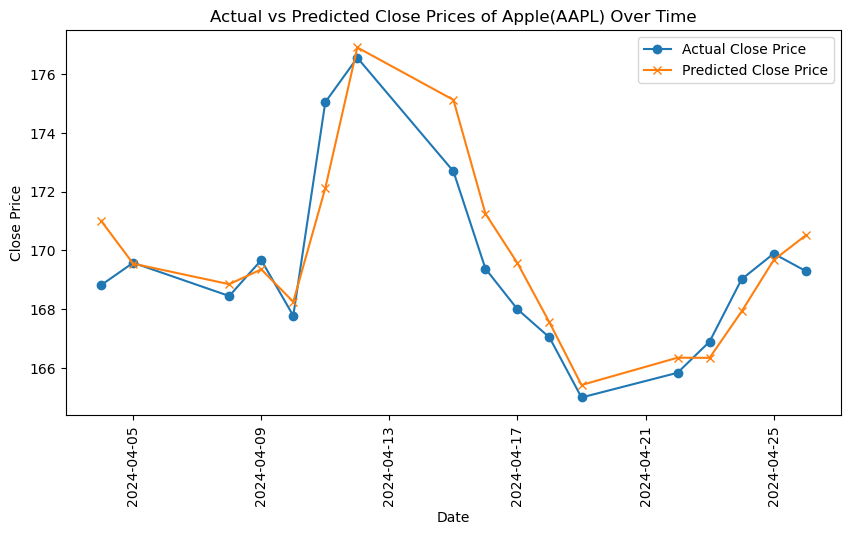

In [188]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(ans_df.iloc[:17,0], ans_df.iloc[:17,2], label='Actual Close Price', marker='o')
plt.plot(ans_df.iloc[:17,0], ans_df.iloc[:17,4], label='Predicted Close Price', marker='x')

plt.title('Actual vs Predicted Close Prices of Apple(AAPL) Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.xticks(rotation=90)
plt.show()

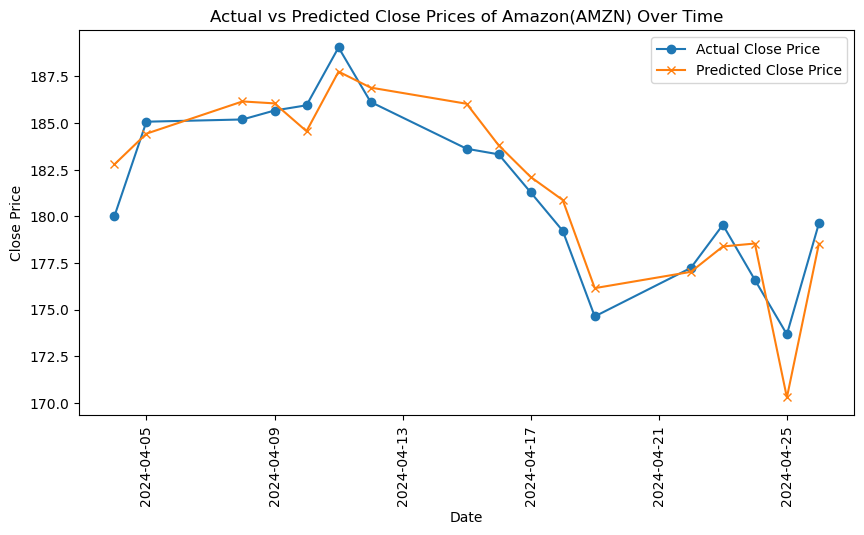

In [189]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(ans_df.iloc[17:34,0], ans_df.iloc[17:34,2], label='Actual Close Price', marker='o')
plt.plot(ans_df.iloc[17:34,0], ans_df.iloc[17:34,4], label='Predicted Close Price', marker='x')

plt.title('Actual vs Predicted Close Prices of Amazon(AMZN) Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.xticks(rotation=90)
plt.show()

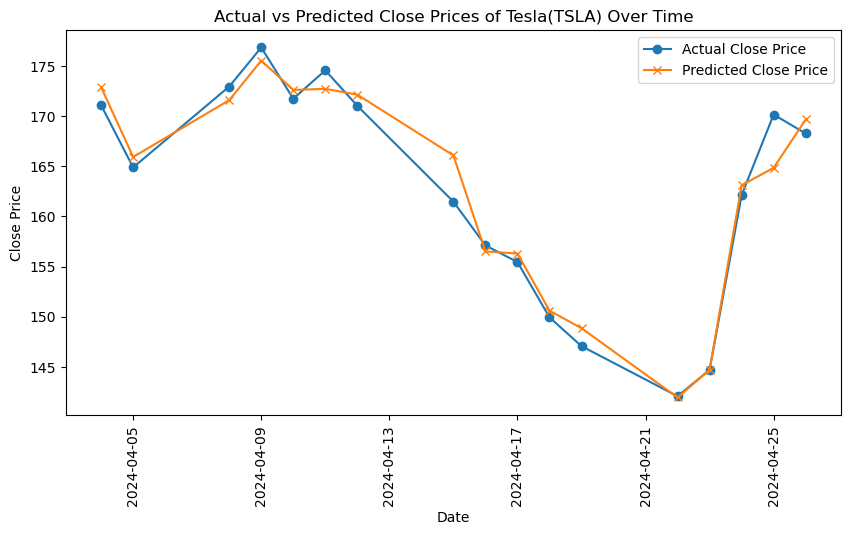

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(ans_df.iloc[34:51,0], ans_df.iloc[34:51,2], label='Actual Close Price', marker='o')
plt.plot(ans_df.iloc[34:51,0], ans_df.iloc[34:51,4], label='Predicted Close Price', marker='x')

plt.title('Actual vs Predicted Close Prices of Tesla(TSLA) Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.xticks(rotation=90)
plt.show()

In [191]:
# SVM RBF

In [192]:
# svm_reg = SVR(kernel='rbf', C=1, gamma='scale')
# svm_reg.fit(X_train, y_train)

In [193]:
# y_pred = svm_reg.predict(X_test)

In [194]:
# mean_squared_error(y_test, y_pred)

In [195]:
# r2_score(y_test, y_pred)

In [196]:
# yyy=svm_reg.predict(X_train)

In [197]:
# mean_squared_error(y_train, yyy)

In [198]:
# r2_score(y_train, yyy)

In [199]:
# LSTM

In [200]:
# model = Sequential()
# model.add(Input(shape=(15,)))  # Input shape: (15,)
# model.add(Reshape((1, 15)))  # Reshape to (batch_size, timesteps, input_dim)
# model.add(LSTM(100, return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification


# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [201]:
# model.fit(X_train, y_train, epochs=30, batch_size=8, validation_split=0.2)

In [202]:
# y_pred=model.predict(X_test)

In [203]:
# mean_squared_error(y_test, y_pred)

In [204]:
# r2_score(y_test, y_pred)

In [205]:
# GRU

In [206]:
# optimizer = Adam(learning_rate=0.001)
# batch_size = 8
# epochs = 30

In [207]:
# X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

# # Reshape test set: (53, 622) -> (53, 1, 622)
# X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [208]:
# model_gru_2hidden = Sequential()
# model_gru_2hidden.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
# model_gru_2hidden.add(GRU(units=100, return_sequences=True))
# model_gru_2hidden.add(GRU(units=50))
# model_gru_2hidden.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification

# # Compile the model
# optimizer = Adam(learning_rate=0.001)
# model_gru_2hidden.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [209]:
# model_gru_2hidden.fit(X_train_reshaped, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)                      

In [210]:
# y_pred=model_gru_2hidden.predict(X_test_reshaped)

In [211]:
# r2_score(y_test, y_pred)

In [212]:
# mean_squared_error(y_test, y_pred)

In [213]:
# yyy=model_gru_2hidden.predict(X_train_reshaped)

In [214]:
# mean_squared_error(y_train,yyy)

## Model On Pretrained Word2Vec

In [215]:
# pre_trained_word2vec=pd.read_pickle("pre_trained_word2vec.pkl")

In [216]:
# pre_trained_word2vec=pd.DataFrame(pre_trained_word2vec)

In [217]:
# final_df=pd.concat([df4[req_col],features_df],axis=1)

In [218]:
# final_df.head()

In [219]:
# final_y=final_df["Close"]
# final_y

In [220]:
# final_df=final_df.drop("Close",axis=1)

In [221]:
# X_test=final_df[-test_size:]
# y_test=final_y[-test_size:]

In [222]:
# comb_train=pd.concat([final_df.iloc[:-test_size,:],final_y[:-test_size]],axis=1)
# comb_train

In [223]:
# shuffled_df = comb_train.sample(frac=1, random_state=42)
# shuffled_df

In [224]:
# X_train=shuffled_df.drop("Close",axis=1)
# y_train=shuffled_df["Close"]

In [225]:
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [226]:
# svm_reg = SVR(kernel='linear', C=1, gamma='scale')
# svm_reg.fit(X_train, y_train)

In [227]:
# y_pred = svm_reg.predict(X_test)

In [228]:
# mean_squared_error(y_test, y_pred)

In [229]:
# r2_score(y_test, y_pred)

In [230]:
# yyy=svm_reg.predict(X_train)

In [231]:
# mean_squared_error(y_train, yyy)

In [232]:
# SVM RBF

In [233]:
# svm_reg = SVR(kernel='rbf', C=1, gamma='scale')
# svm_reg.fit(X_train, y_train)

In [234]:
# y_pred = svm_reg.predict(X_test)

In [235]:
# mean_squared_error(y_test, y_pred)

In [236]:
# r2_score(y_test, y_pred)

In [237]:
# yyy=svm_reg.predict(X_train)

In [238]:
# mean_squared_error(y_train, yyy)

In [239]:
# r2_score(y_train, yyy)

In [240]:
# LSTM

In [241]:
# model = Sequential()
# model.add(Input(shape=(15,)))  # Input shape: (15,)
# model.add(Reshape((1, 15)))  # Reshape to (batch_size, timesteps, input_dim)
# model.add(LSTM(100, return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification


# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [242]:
# model.fit(X_train, y_train, epochs=30, batch_size=8, validation_split=0.2)

In [243]:
# y_pred=model.predict(X_test)

In [244]:
# mean_squared_error(y_test, y_pred)

In [245]:
# r2_score(y_test, y_pred)

In [246]:
# GRU

In [247]:
# optimizer = Adam(learning_rate=0.001)
# batch_size = 8
# epochs = 30

In [248]:
# X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

# # Reshape test set: (53, 622) -> (53, 1, 622)
# X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [249]:
# model_gru_2hidden = Sequential()
# model_gru_2hidden.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
# model_gru_2hidden.add(GRU(units=100, return_sequences=True))
# model_gru_2hidden.add(GRU(units=50))
# model_gru_2hidden.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification

# # Compile the model
# optimizer = Adam(learning_rate=0.001)
# model_gru_2hidden.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [250]:
# model_gru_2hidden.fit(X_train_reshaped, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
                      

In [251]:
# y_pred=model_gru_2hidden.predict(X_test_reshaped)

In [252]:
# r2_score(y_test, y_pred)

In [253]:
# mean_squared_error(y_test, y_pred)

In [254]:
# yyy=model_gru_2hidden.predict(X_train_reshaped)

In [255]:
# mean_squared_error(y_train,yyy)